In [60]:
#importing important libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np

In [61]:
df = pd.read_csv(r'Desktop/Hamoye/HAMOYE/Hamoye/mxmh_survey_results.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [63]:
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [65]:
df.isnull().sum()

Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

In [66]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [67]:
#Filling missing data
df['BPM'].fillna((df['BPM'].median()), inplace=True)
df['Age'].fillna((df['Age'].median()), inplace=True)
df['Primary streaming service'].fillna(method='ffill', inplace=True) #categorical
df['Foreign languages'].fillna(method='ffill', inplace=True)
df['Composer'].fillna(method='ffill', inplace=True)
df['Music effects'].fillna(method='ffill', inplace=True)
df['While working'].fillna(method='ffill', inplace=True)
df['Instrumentalist'].fillna(method='ffill', inplace=True)

In [68]:
df.isnull().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [69]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,No effect,I understand.
1,8/27/2022 19:57,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,No effect,I understand.
2,8/27/2022 21:28,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [70]:
df.tail()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
731,10/30/2022 14:37,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.
735,11/9/2022 1:55,29.0,YouTube Music,2.0,Yes,No,No,Hip hop,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Rarely,2.0,2.0,2.0,5.0,Improve,I understand.


In [71]:
df.keys()

Index(['Timestamp', 'Age', 'Primary streaming service', 'Hours per day',
       'While working', 'Instrumentalist', 'Composer', 'Fav genre',
       'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects',
       'Permissions'],
      dtype='object')

In [72]:
df['Timestamp'].iloc[0], type(df['Timestamp'].iloc[0])

('8/27/2022 19:29', str)

In [73]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [74]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [75]:
df['year'] = df['Timestamp'].apply(lambda time: time.year)
df['month'] = df['Timestamp'].apply(lambda time: time.month)
df['hour'] = df['Timestamp'].apply(lambda time: time.hour)
df['week_day'] = df['Timestamp'].apply(lambda time: time.dayofweek)

In [76]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
             7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'} 

In [77]:
df['day_name'] = df['week_day'].map(day_map)
df['month_map'] = df['month'].map(month_map)

In [78]:
df['day_name'] = df['week_day'].map(day_map)
df['month_name'] = df['month'].map(month_map)

In [79]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,OCD,Music effects,Permissions,year,month,hour,week_day,day_name,month_map,month_name
0,2022-08-27 19:29:00,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,0.0,No effect,I understand.,2022,8,19,5,Sat,Aug,Aug
1,2022-08-27 19:57:00,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,1.0,No effect,I understand.,2022,8,19,5,Sat,Aug,Aug
2,2022-08-27 21:28:00,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,2.0,No effect,I understand.,2022,8,21,5,Sat,Aug,Aug
3,2022-08-27 21:40:00,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,3.0,Improve,I understand.,2022,8,21,5,Sat,Aug,Aug
4,2022-08-27 21:54:00,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,9.0,Improve,I understand.,2022,8,21,5,Sat,Aug,Aug


<Axes: xlabel='month_map', ylabel='count'>

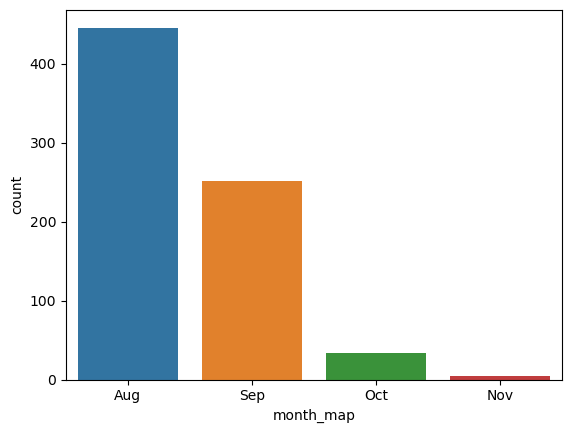

In [80]:
#To find busiest month when people played music most
sns.countplot(x = 'month_map', data = df)

<Axes: xlabel='day_name', ylabel='count'>

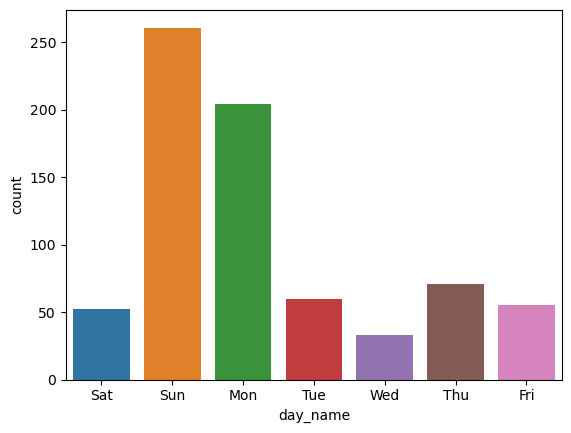

In [81]:
#To find the day people played music most
sns.countplot(x = 'day_name', data = df)

In [82]:
#check minimum and maximum age
df['Age'].min(), df['Age'].max()

(10.0, 89.0)

<Axes: xlabel='Age', ylabel='count'>

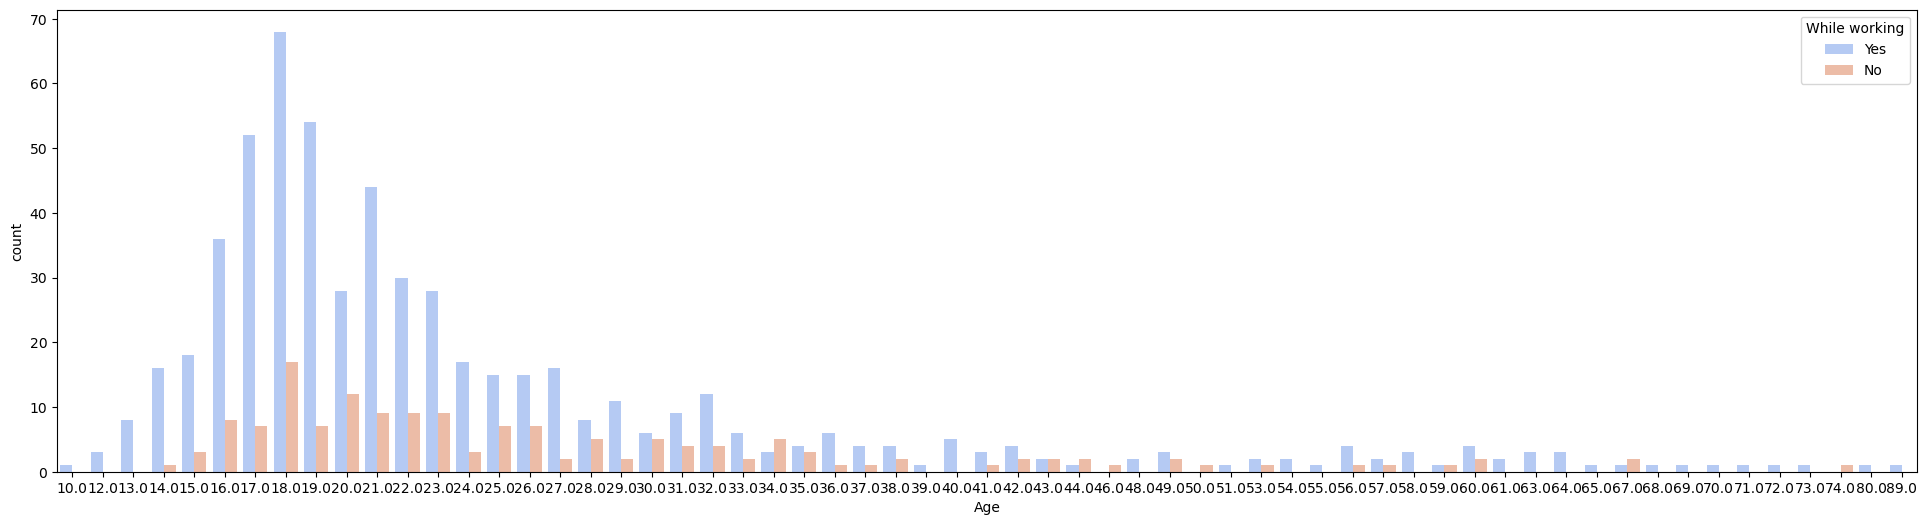

In [83]:
#Gives clue as to what age played music while working and while not working
plt.figure(figsize=(24,6))
sns.countplot(x = 'Age', data = df,hue='While working', palette = 'coolwarm')

<Axes: xlabel='Age', ylabel='count'>

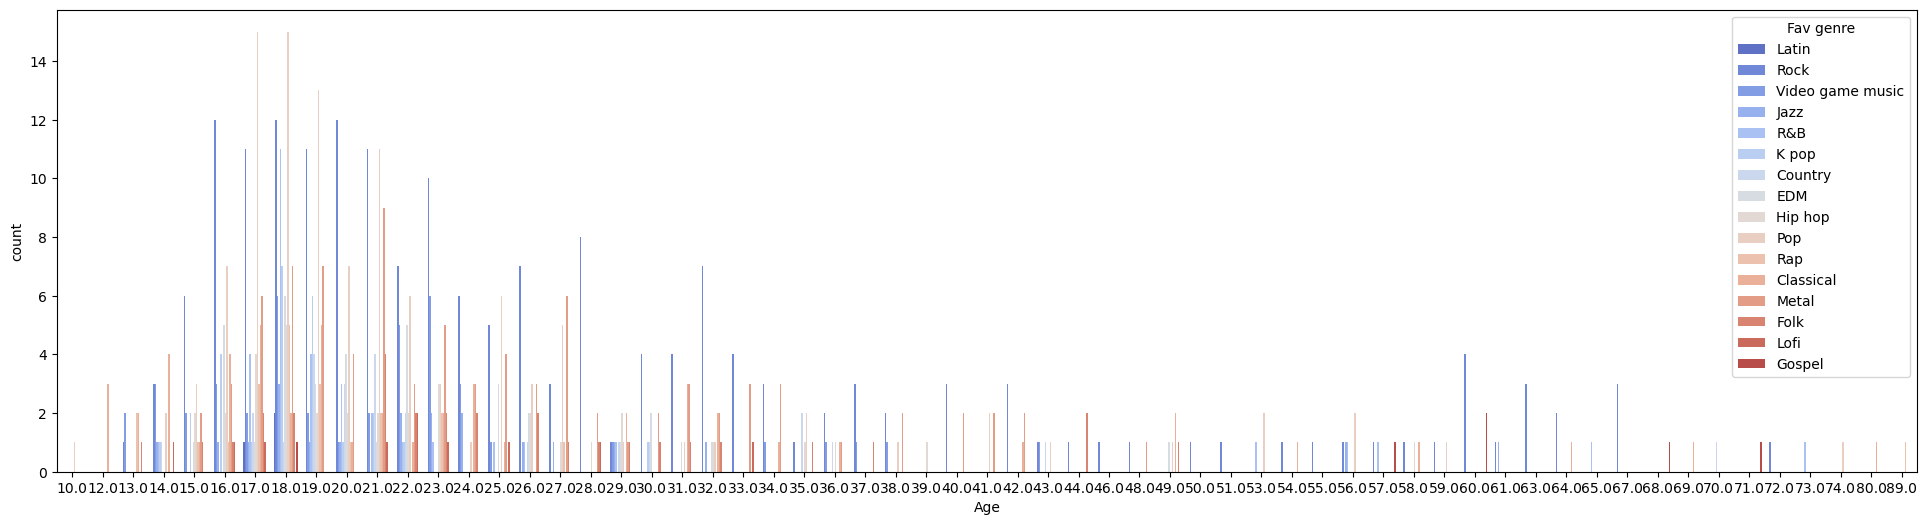

In [84]:
plt.figure(figsize=(24,6))
sns.countplot(x = 'Age', data = df,hue='Fav genre', palette = 'coolwarm')

<Axes: xlabel='Fav genre', ylabel='count'>

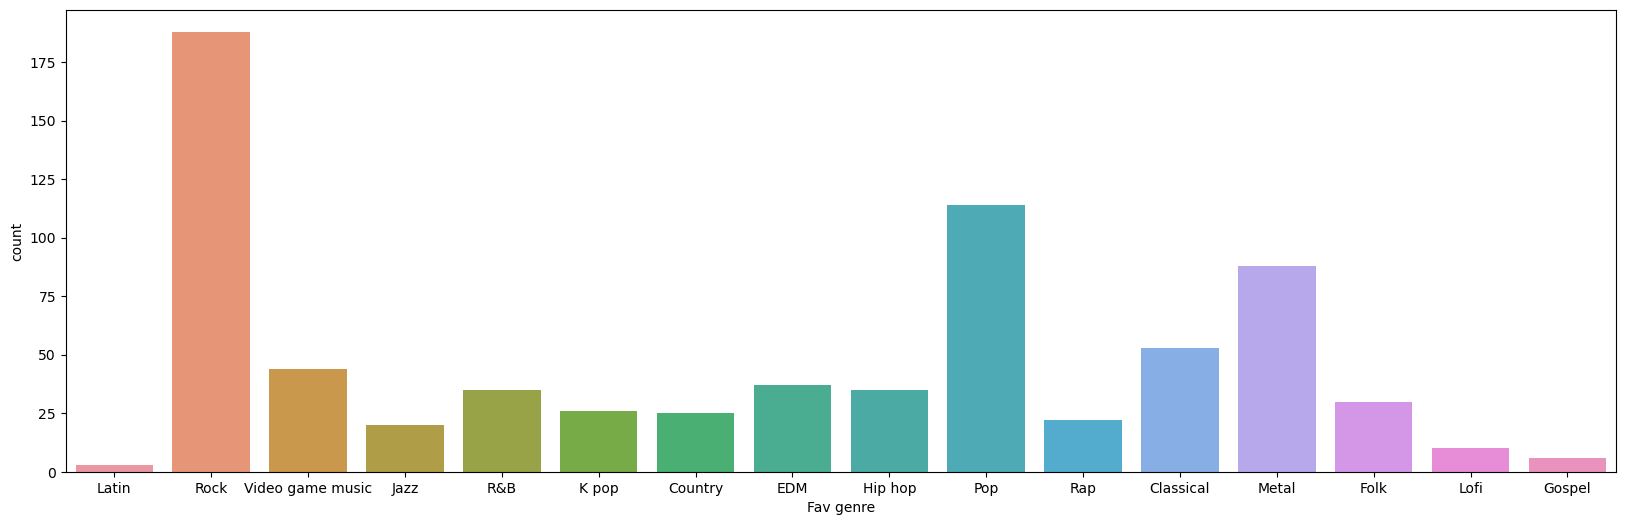

In [85]:
#music most listened to
plt.figure(figsize=(20,6))
sns.countplot(x = 'Fav genre', data = df)

<Axes: xlabel='Primary streaming service', ylabel='count'>

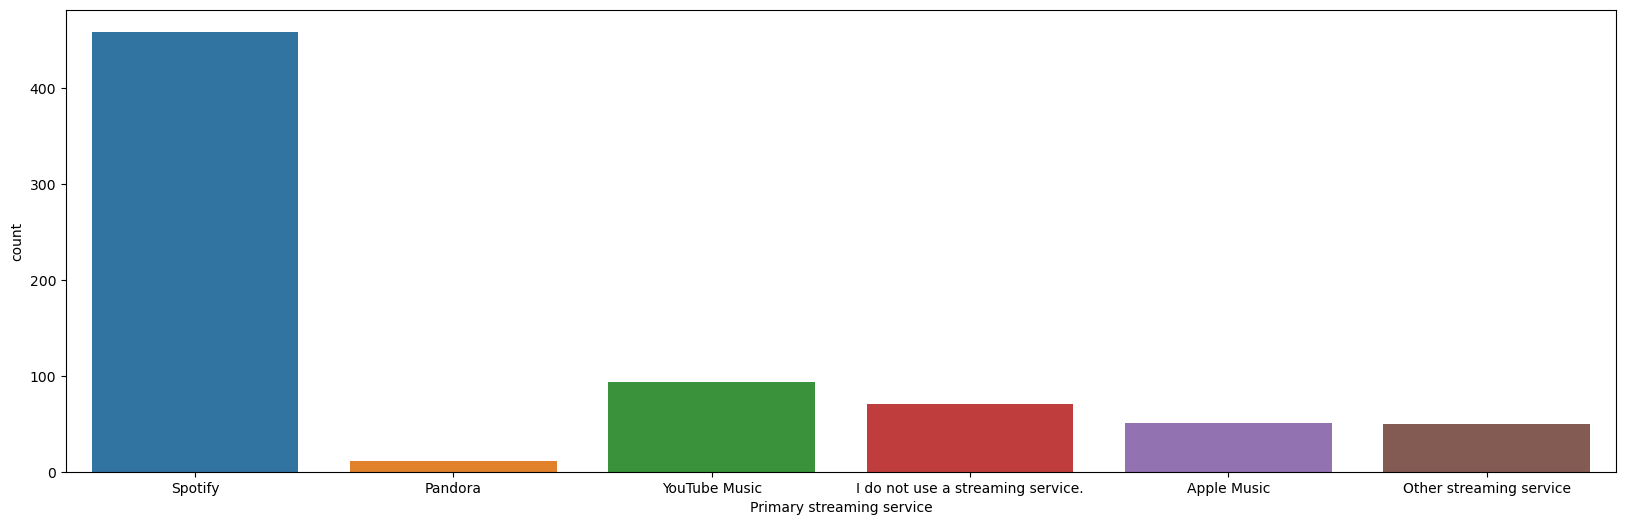

In [86]:
#Streaming service most used
plt.figure(figsize=(20,6))
sns.countplot(x = 'Primary streaming service', data = df)

<Axes: xlabel='Age', ylabel='count'>

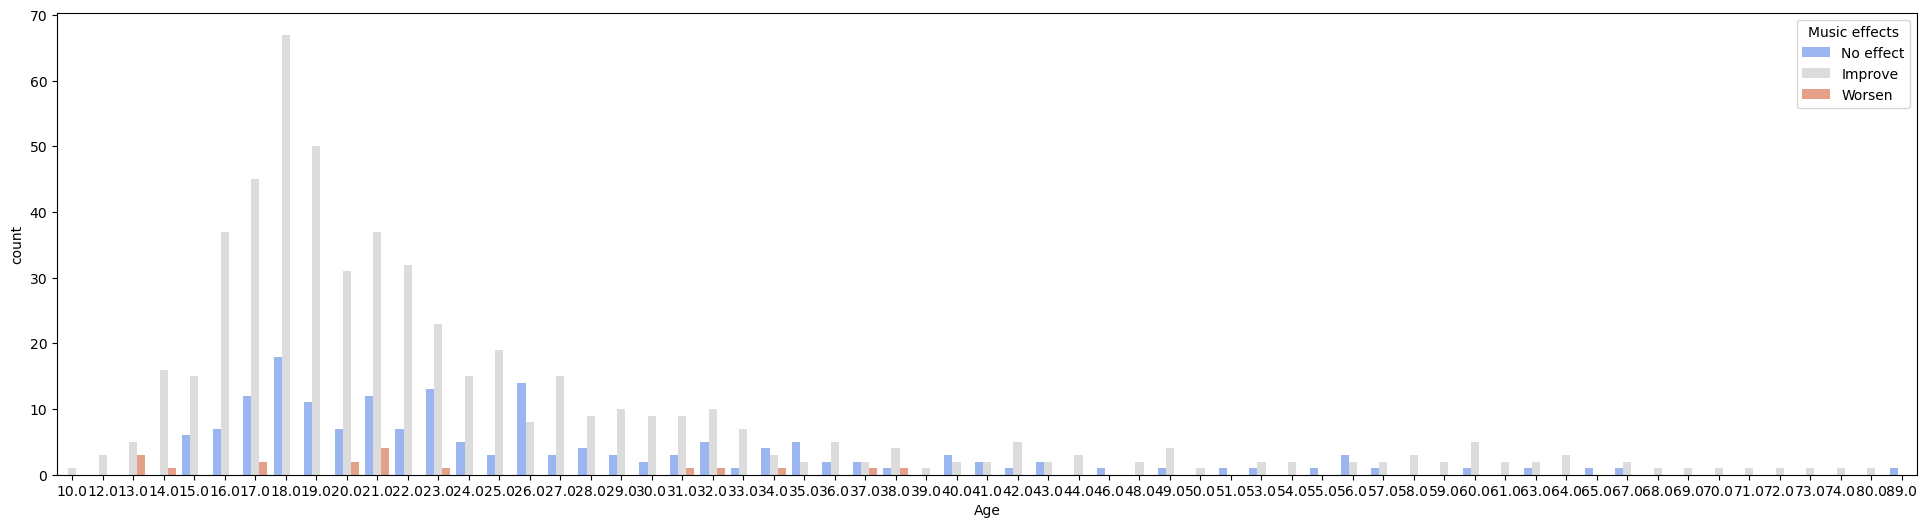

In [87]:
#music effects by age
plt.figure(figsize=(24,6))
sns.countplot(x = 'Age', data = df,hue='Music effects', palette = 'coolwarm')

<Axes: xlabel='Age', ylabel='count'>

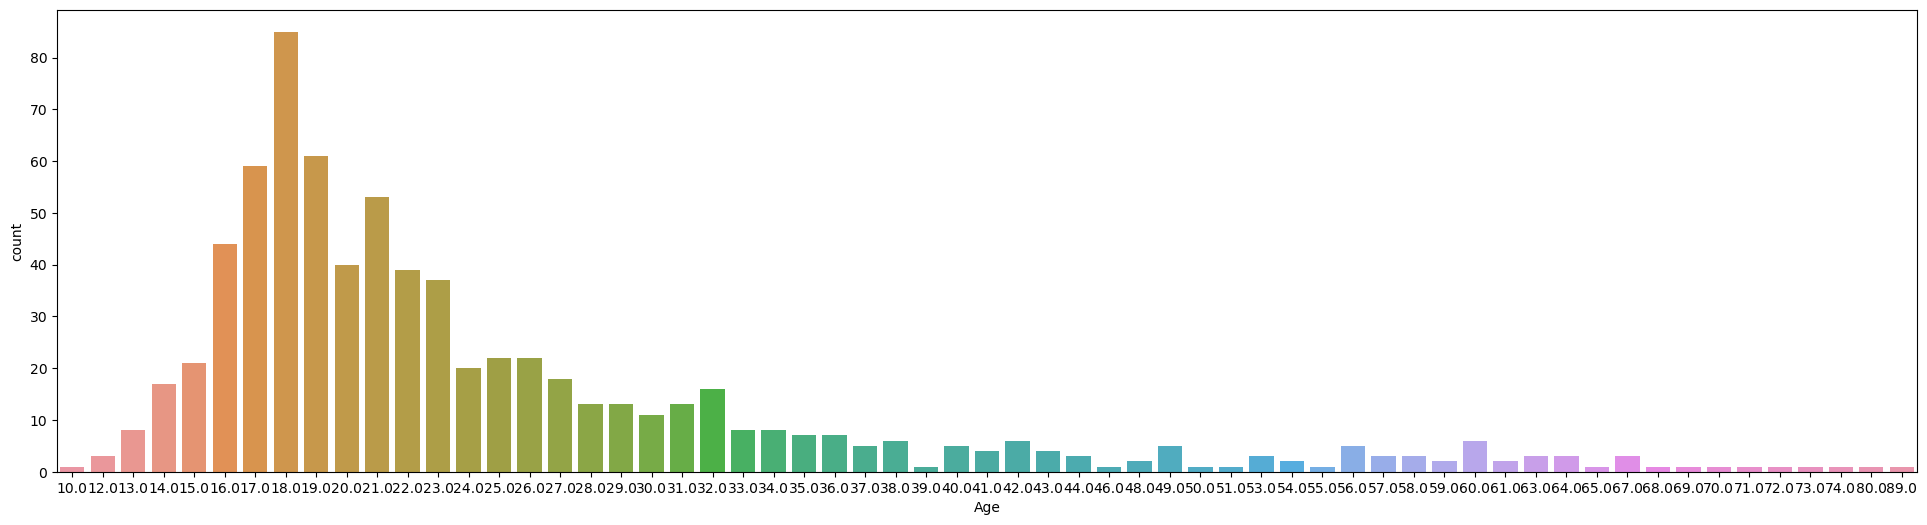

In [88]:
#To find age that played most music
plt.figure(figsize=(24,6))
sns.countplot(x = 'Age', data = df)

<Axes: xlabel='Fav genre', ylabel='count'>

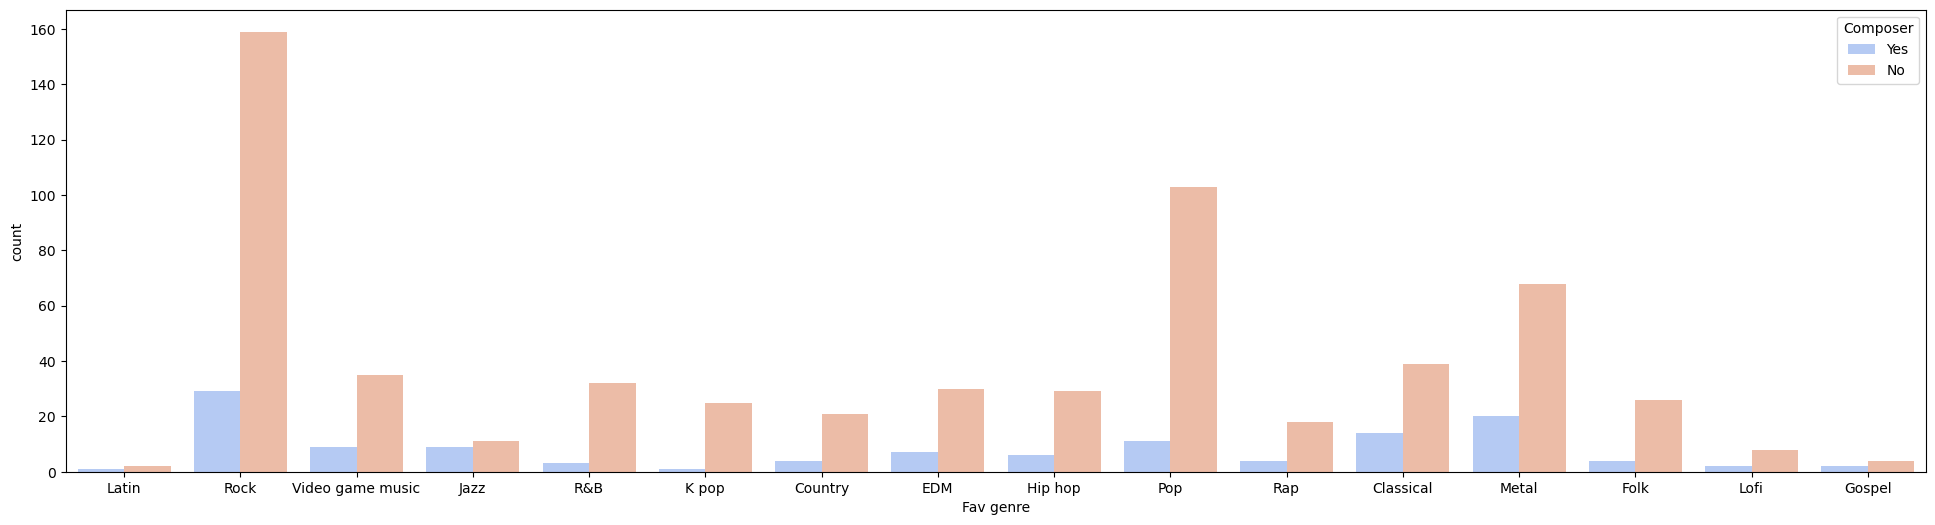

In [89]:
#To find the kind of music composers listened to
plt.figure(figsize=(24,6))
sns.countplot(x = 'Fav genre', data = df,hue='Composer', palette = 'coolwarm')

<Axes: xlabel='Fav genre', ylabel='count'>

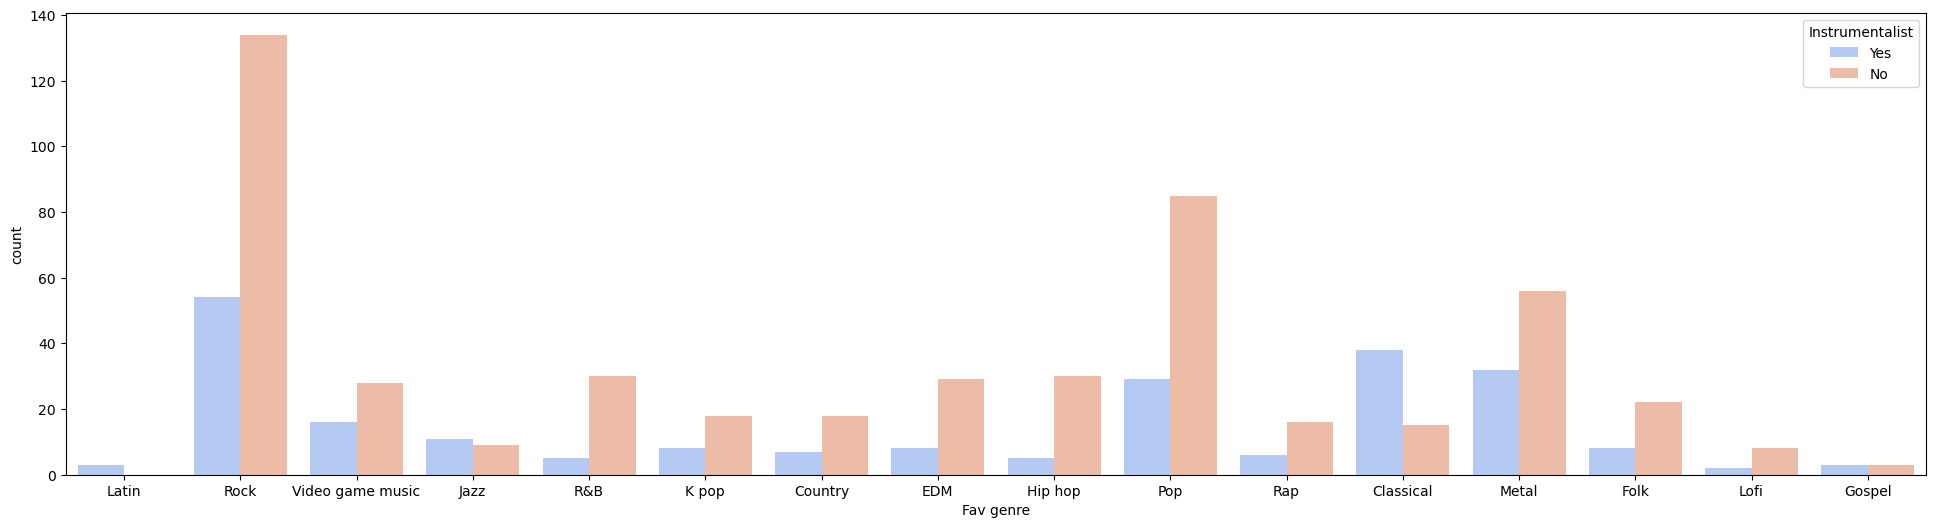

In [90]:
#To find the kind of music instrumentalists listened to
plt.figure(figsize=(24,6))
sns.countplot(x = 'Fav genre', data = df,hue='Instrumentalist', palette = 'coolwarm')

In [91]:
df['Music effects'].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [92]:
categ_col = df.select_dtypes(include=['object', 'category']).columns
num_cols = [col for col in df.columns if col not in categ_col]
print(categ_col)

Index(['Primary streaming service', 'While working', 'Instrumentalist',
       'Composer', 'Fav genre', 'Exploratory', 'Foreign languages',
       'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]',
       'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]',
       'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]',
       'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
       'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]',
       'Frequency [Video game music]', 'Music effects', 'Permissions',
       'day_name', 'month_map', 'month_name'],
      dtype='object')


In [93]:
print(num_cols)

['Timestamp', 'Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'year', 'month', 'hour', 'week_day']


In [94]:
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,OCD,Music effects,Permissions,year,month,hour,week_day,day_name,month_map,month_name
0,2022-08-27 19:29:00,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,0.0,No effect,I understand.,2022,8,19,5,Sat,Aug,Aug
1,2022-08-27 19:57:00,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,1.0,No effect,I understand.,2022,8,19,5,Sat,Aug,Aug
2,2022-08-27 21:28:00,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,2.0,No effect,I understand.,2022,8,21,5,Sat,Aug,Aug
3,2022-08-27 21:40:00,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,3.0,Improve,I understand.,2022,8,21,5,Sat,Aug,Aug
4,2022-08-27 21:54:00,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,9.0,Improve,I understand.,2022,8,21,5,Sat,Aug,Aug


In [95]:
df.drop(['Timestamp'], axis=1, inplace=True)
df.drop(['year'], axis=1, inplace=True)
df.drop(['Permissions'], axis=1, inplace=True)

In [96]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Depression,Insomnia,OCD,Music effects,month,hour,week_day,day_name,month_map,month_name
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,0.0,1.0,0.0,No effect,8,19,5,Sat,Aug,Aug
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,2.0,2.0,1.0,No effect,8,19,5,Sat,Aug,Aug
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,7.0,10.0,2.0,No effect,8,21,5,Sat,Aug,Aug
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,7.0,3.0,3.0,Improve,8,21,5,Sat,Aug,Aug
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,2.0,5.0,9.0,Improve,8,21,5,Sat,Aug,Aug


In [97]:
print(num_cols)

['Timestamp', 'Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'year', 'month', 'hour', 'week_day']


In [98]:
df['Music effects'].unique()

array(['No effect', 'Improve', 'Worsen'], dtype=object)

In [99]:
df['Music effects'].replace({'Worsen': 0, 'No effect': 1, 'Improve': 2}, inplace=True)

In [100]:
df.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Depression,Insomnia,OCD,Music effects,month,hour,week_day,day_name,month_map,month_name
0,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,...,0.0,1.0,0.0,1,8,19,5,Sat,Aug,Aug
1,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,...,2.0,2.0,1.0,1,8,19,5,Sat,Aug,Aug
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,7.0,10.0,2.0,1,8,21,5,Sat,Aug,Aug
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,7.0,3.0,3.0,2,8,21,5,Sat,Aug,Aug
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,2.0,5.0,9.0,2,8,21,5,Sat,Aug,Aug


In [101]:
new_df = df

In [102]:
#Splitting data
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [103]:
#Splitting the data into x and y
#df.drop(['While_working_norm'], axis=1, inplace=True)
X = new_df[['Age','Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'hour' ]]
y = new_df['Music effects']

In [104]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [105]:
# let's check the head of X_train, just for a quick look
x_train.head()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,hour
677,21.0,3.0,145.0,9.0,7.0,7.0,5.0,18
194,30.0,1.0,162.0,8.0,5.0,8.0,9.0,20
391,18.0,5.0,124.0,7.0,4.0,5.0,6.0,18
491,60.0,1.0,120.0,6.0,2.0,8.0,0.0,20
511,43.0,1.0,110.0,5.0,1.0,1.0,1.0,4


In [106]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((493, 8), (493,), (243, 8), (243,))

In [107]:
#Model Training
models = {
    "DecisionTree Regressor": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Ridge": Ridge(alpha=0.5), #Ridge regression adds a penalty to the loss function that forces the model to keep the
                               #coefficient small. This helps to reduce overfittion.
    "Lasso": Lasso(alpha=0.5), #Lasso regression, similar to ridge, adds a penalty to the loss function. However, it uses
                              #the L1 norm instead of the L2 norm. This leads to sparsity in the model, where some
                              #coefficients become exactly zero, effectively performing feature selection.
    "svm_m": SVC(),
    "logr": LogisticRegression(),
    "knn" : KNeighborsClassifier(n_neighbors = 1),
    "kmeans": KMeans(n_clusters=3)   
}

#Setting up a function to fit and score model
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fits and evaluates given machine learning models
    models: a dict of diff scikit learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training models
    y_test: testing labels
    """
    #setting up a random seed
    np.random.seed(42)
    #making a dictionary to keep model score"s
    model_scores = {}
    #looping thru models
    for name, model in models.items():
        #fitting the model to the data
        model.fit(x_train, y_train)
        #evaluating the model and appending its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [108]:
scores = fit_and_score(models=models,
                              X_train=x_train,
                              X_test=x_test,
                              y_train=y_train,
                              y_test=y_test)
scores

C:\Users\BGP001\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\BGP001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BGP001\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment vari

{'DecisionTree Regressor': -0.9757305294045722,
 'Random Forest': -0.04263310918205154,
 'Ridge': -2600649.795845254,
 'Lasso': -0.014527910047140269,
 'svm_m': 0.7037037037037037,
 'logr': 0.7037037037037037,
 'knn': 0.588477366255144,
 'kmeans': -9.999987500005578e+17}

In [109]:
new_model=pd.DataFrame(scores, index=['R2_Score'])

In [110]:
new_model.drop(['Random Forest'], axis=1, inplace=True)
new_model.drop(['Ridge'], axis=1, inplace=True)
new_model.drop(['kmeans'], axis=1, inplace=True)
new_model.drop(['Lasso'], axis=1, inplace=True)

In [111]:
new_model.drop(['DecisionTree Regressor'], axis=1, inplace=True)

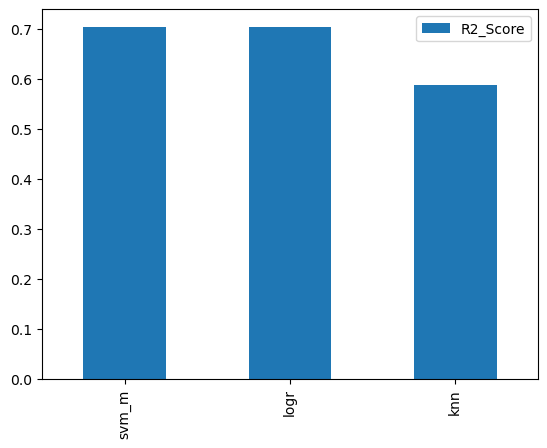

In [112]:
new_model.T.plot.bar(); #T means Transpose to improve plot

In [113]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [ ]:
prediction = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

In [ ]:
err_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    err_rate.append(np.mean(pred_i != y_test))

In [ ]:
sns.set_style('darkgrid')

In [ ]:
plt.figure(figsize = (16,6))
plt.plot(range(1,100),err_rate, color = 'green', marker = 'o', markerfacecolor = 'blue')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))